# BET Surface Area

The BET equation for determining the specific surface area from multilayer adsorption of nitrogen was first reported in 1938.

Brunauer, Stephen, Paul Hugh Emmett, and Edward Teller. ["Adsorption of gases in multimolecular layers."](http://pubs.acs.org/doi/abs/10.1021/ja01269a023) Journal of the American Chemical Society 60, no. 2 (1938): 309-319.

##BET Surface Area Calculation Description

The BET data reduction applies to isotherm data.  The isotherm consists of the quantity adsorbed $Q_i$ (in cm^3/g STP) and the relative pressure $P^{rel}_i$ for each point $i$ selected for the calculation.  

THe BET model also requires the cross sectional area of the adsorptive, $\sigma_{ads}$ (in nm^2). 

###BET transformation calculation

The first thing is to calculate the BET transform $T_i$.  This is done as follows:  

$\displaystyle {T_i=\frac{1}{Q_i(1/P^{rel}_i-1)}}$

Then a least a least-squares fit is performed on the $T_i$ vs. $P^{rel}_i$ data.  This fit calculates the following: 

1. $m$: The slope of the best fit line. 
2. $Y_0$: The Y-intercept of the best fit line. 
3. $\sigma_m$: The uncertainty of the slope from the fit calculation.  
4. $\sigma_{Y_0}$: The uncertainty of the Y-intercept the the fit calculation. 
5. $r$ The correlation coefficient between the $T_i$ and $P^{rel}_i$. 


### Calculating the BET results

The slope of the line and intercept may be used to calculate the monolayer capacity $Q_m$ and the BET $c$ constant.

The fist thing to calculate is the BET $C$ value: 
$\displaystyle {C = 1 + \frac{m}{Y_0}}$

From this we can caclulate the monolayer capacity $Q_m$: 
$\displaystyle Q_m = \frac{1}{C*Y_0}$

Finally, we can calculate the BET surface area $A_{BET}$: 

$\displaystyle A_{BET} =\frac{N_A \sigma_{ads}}{V_{STP} U_{mn^2,m^2} (m + Y_0)}$

Where: 
* $V_{STP}$: volume of a molr of gas at STP $22414.0$ cm^3
* $N_A$: Number of molecules in a mole of gas: $6.02214129\times 10^{23}$. 
* $U_{mn^2,m^2}$: Unit conversion form nm^2 to m^2: $10^{18}$. 

Finally, we can find the uncertainty in the surface area $\sigma_{SA_{BET}}$ from the uncertainty in the line fit results:  

$\displaystyle \sigma_{A_{BET}} = A_{BET} \frac{\sqrt{\sigma_m^2+\sigma_{Y_0}^2}}{m + Y_0}$


## BET: Example Calculation

As an example of the BET calculation, we use the refernce calculation from the [report-models-python](https://github.com/Micromeritics/report-models-python) on github from Micromeritics. This tool not only provides example the reference caclulations, but aslo provides exampel data to work with, and utilities to make working with the data batter.   

For this example, we start with a Carbon Black Reference material $N_2$ istherm at 77K, and restrict it to the ususal 0.05 to 0.3 relative pressure range.  

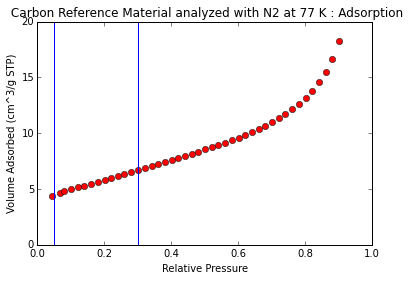

In [1]:
%matplotlib inline
from micromeritics import bet, util, isotherm_examples as ex, plots

s = ex.carbon_black()   # example isotherm of Carbon Black with N2.  
min = 0.05              # 0.05 to 0.30 range for BET 
max = 0.3
Q,P = util.restrict_isotherm(s.Qads, s.Prel, min, max)
plots.plotIsotherm(s.Qads, s.Prel, s.descr[s.descr.find(':')+1:], min, max )

We then use the BET reference calculation on that restricted range (along with the molecular cross sectional area of 0.162 nm^2 to do teh calculation above.  Below we show the tranform plot along with its best fit line. 

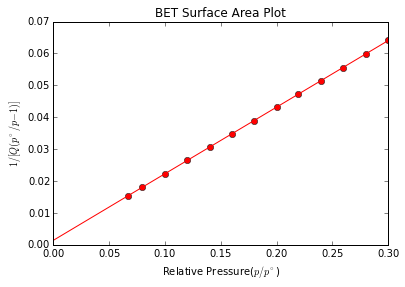

In [2]:
B = bet.bet(Q, P, 0.162)
plots.plotBET(P, B.transform, B.line_fit.slope, B.line_fit.y_intercept, max )

Finally, we show the BET results.  

In [3]:
print("BET surface area: %.4f ± %.4f m²/g" % (B.sa, B.sa_err))
print("C:                %.6f" % B.C)
print("Qm:               %.4f cm³/g STP" % B.q_m)

BET surface area: 20.7049 ± 0.0289 m²/g
C:                149.961535
Qm:               4.7569 cm³/g STP
